# Practical session 2 - Practise with classic libraries

Students (pair):
- [Killian Heim]([link](https://github.com/username1))
- [Oriane Longeron](https://github.com/Oriiiane)

```
conda create --name=lab2 --file=requirement.txt
conda activate lab2
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab2
```

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [1]:
%load_ext autoreload
%autoreload 2

## <a name="import">Import</a>

In [2]:
# Exercice 1
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.special as sps 

# Exercice 2
import pandas as pd
from IPython.display import display

# Exercice 3
import unittest

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [3]:
seed = 12
rng = np.random.default_rng(seed)
# Generating a random number using the numpy default generator for a fixed seed of 12
print(rng.random())

0.2508244581084461


In [4]:
seed = 12
rng = np.random.default_rng(seed)
print(rng.random())

0.2508244581084461


*By running this code several times, the same random numbers will be generated each time, proving that the instruction works as expected and guaranteeing reproducibility.*

2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [5]:
alpha = 9
beta = 2

# Generation of ~10^5 samples in a vector
u = rng.gamma(alpha, 1/beta, 10**5)
print(u)

#Saving the data in a .npy file
np.save("samples", u)

#Saving the data in a .hdf5 file 
with h5py.File('samples.hdf5', 'w') as hdf:
    hdf.create_dataset('u', data = u)

[6.06281921 5.4887075  2.7900066  ... 4.61002724 5.96117044 4.66912906]


3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

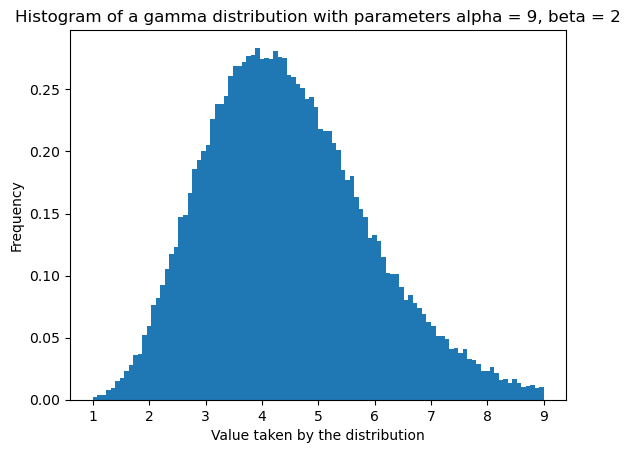

In [6]:
mean = alpha/beta
std = np.sqrt(alpha)/beta

plt.hist(u, 100, (1, mean + 3 * std), density = True)
plt.title("Histogram of a gamma distribution with parameters alpha = 9, beta = 2")
plt.xlabel("Value taken by the distribution")
plt.ylabel("Frequency")
plt.plot()
plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

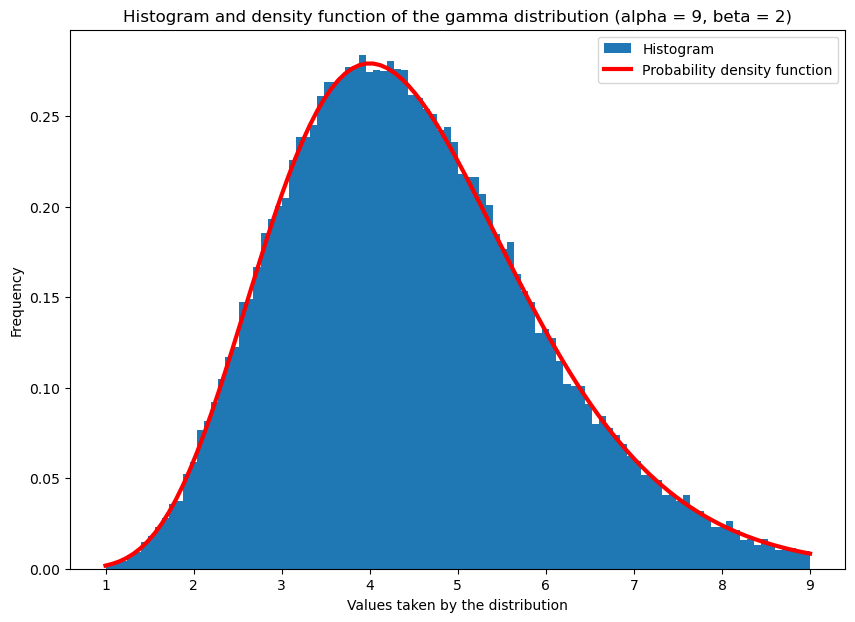

In [7]:
count, bins = np.histogram(u, 100, (1, mean + 3 *std), density = True)
y = bins**(alpha-1)*np.exp(-beta*bins)*(beta**alpha)/(sps.gamma(alpha))

plt.figure(figsize=(10, 7))
plt.hist(u, 100, (1, mean + 3 *std),density = True, label = "Histogram")
plt.plot(bins, y, linewidth = 3, color = 'r', label = "Probability density function")

plt.title("Histogram and density function of the gamma distribution (alpha = 9, beta = 2)")
plt.xlabel("Values taken by the distribution")
plt.ylabel("Frequency") 
plt.legend()

# Saving the resulting picture in .png format 
plt.savefig('gamma_distribution.png', format='png')

plt.show()

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [8]:
# Creation of the DataFrame
df = pd.read_csv("data/data.csv")

# Sort data by X column
df = df.sort_values(by=["X"], ignore_index=True)

display(df)

,X,Y
0,56,37
1,68,34
2,98,25
3,110,36
4,128,28
5,180,24
6,181,20
7,190,24
8,192,22
9,197,24


In [9]:
# Computation of the median for X and Y
medians = df.median()

print("Median :")
print(medians)

Median :
X    180.5
Y     24.0
dtype: float64


In [10]:
# Computation of the median for X and Y
means = df.mean()

print("Mean :")
print(means)

Mean :
X    153.750000
Y     25.916667
dtype: float64


In [11]:
# Computation of the variance for X and Y
variances = df.var()

print("Variance :")
print(variances)

Variance :
X    3486.022727
Y      42.446970
dtype: float64


In [12]:
# Computation of the standard deviation for X and Y
stds = df.std()

print("Standard deviation :")
print(stds)

Standard deviation :
X    59.042550
Y     6.515134
dtype: float64


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [13]:
# Convert DataFrame data into a numpy array
X = df['X'].to_numpy()
Y = df['Y'].to_numpy()

# Linear regression with np.polyfit (degree 1 for a straight line)
pente, origine = np.polyfit(X, Y, 1)

# Display the equation of the regression line
print(f"The equation is : Y = {pente:.2f}*X + {origine:.2f}")

# Prediction of Y values using np.polyval
Y_pred = np.polyval([pente, origine], X)

# Display of predicted Y values
print("Predicted Y values :", Y_pred)

The equation is : Y = -0.10*X + 41.01
Predicted Y values : [35.51227087 34.33429388 31.38935141 30.21137443 28.44440895 23.33984201
 23.24167726 22.35819452 22.16186502 21.67104128 20.19857005 18.13711032]


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

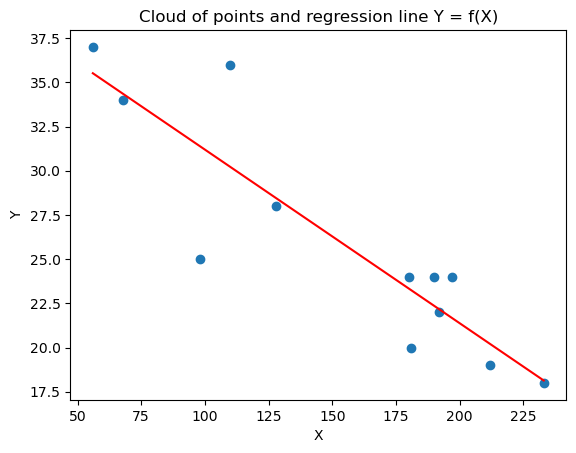

In [14]:
plt.plot(X,Y_pred, color='red')
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Cloud of points and regression line Y = f(X)")

# Saving the resulting picture in .png format 
plt.savefig('linear_regression.png', format='png')
plt.show()

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [15]:
def gradient2D(X):
    """ This is a function that computes the 2D discrete gradient of a matrix X. 

    Arguments: 
        X {np.darray} -- Array to which the discrete gradient operator is applied

    Raises:
        AssertionError -- Raises an error if the input array has more than 2 dimensions

    Returns:
        (XDh, DvX) {tuple} -- Returns a tuple that contains the two arrays XDh {np.darray} and DvX {np.darray} 
    """
    
    assert np.ndim(X) <= 2, "The input array cannot have more than 2 dimensions."

    # Computing the horizontal difference of coefficients for X
    XDh = np.diff(X)

    # We distinct the case where the dimension of the input array has only one dimension
    if np.ndim(X) == 1:
        # For the case np.ndim(X) = 1, the matrix correspond to DvX
        DvX = np.concatenate(([XDh, [0]]))
        
        # In this case XDh is a matrix of same shape than X with only zeros
        return (np.zeros(X.shape), DvX) 
        
    elif np.ndim(X) == 2:
        DvX = np.diff(X, axis = 0) 
        
        zeroColumn = np.zeros(((X.shape)[0],1))
        zeroRow = np.zeros((1, (X.shape)[1]))
        
        # XDh is the concatenation of np.diff(X) and a column of zeros
        XDh = np.concatenate([XDh, zeroColumn], axis = 1) 
        # DvX is the concatenation of np.diff(X, axis = 0) and a row of zeros
        DvX = np.concatenate([DvX, zeroRow], axis = 0)
        
        return (XDh, DvX)

X = np.array([[2,4],[5,6],[1,1]])
print(gradient2D(X)[1])

[[ 3.  2.]
 [-4. -5.]
 [ 0.  0.]]


2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [16]:
class testGradient2D(unittest.TestCase):
    def test_output_format(self):
        X = np.array([[7,1,3],[8,1,2],[2,9,4],[5,3,2]])
        gradX = gradient2D(X)
        self.assertIsInstance(gradX, tuple) 
        self.assertEqual(len(gradX),2)
        self.assertIsInstance(gradX[0],np.ndarray)
        self.assertIsInstance(gradX[1],np.ndarray)
        self.assertEqual(gradX[0].shape,X.shape)
        self.assertEqual(gradX[1].shape,X.shape)

    def test_on_constant_square_matrix(self):
        X = np.array([[1,1,1],[1,1,1],[1,1,1]])
        gradX = gradient2D(X)
        self.assertEqual(np.any(gradX[0]),False)
        self.assertEqual(np.any(gradX[1]),False)

    def test_on_constant_non_square_matrix(self):
        X = np.array([[2,2],[2,2],[2,2]])
        gradX = gradient2D(X)
        self.assertEqual(np.any(gradX[0]),False)
        self.assertEqual(np.any(gradX[1]),False)
        
    def test_for_higher_dimensions(self): # Testing if gradient2D returns an AssertionError when the number of dimensions is superior to 2
        np.random.seed(15)
        X = np.random.rand(3,3,3)
        with self.assertRaises(AssertionError):
            gradient2D(X)
        
        
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(testGradient2D))
     

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

*Doctring added to the gradient2D function (please refer to question 1).*

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [17]:
def TV(X):
    """ This is a function that compute the discrete isotropic total variation of an array X using the gradient2D function. 

    Arguments: 
        X {np.darray} -- Array to which the TV is calculated

    Returns:
        np.sum(M) {float} -- Returns the TV of the array X. Note that np.sum(M) is always positive by definition. 
    """
    grad = gradient2D(X)
    # We define an array of generic term sqrt(|XDh|**2(m,n)+|DvX|**2(m,n))
    M = np.sqrt(np.absolute(grad[0])**2 + np.absolute(grad[1])**2)

    # We obtain the TV of X by summing the coefficients of the array M
    return(np.sum(M))
    
X = np.array([[1+2j,4+1j],[2,5]])
TV(X)

8.287196908580512

In [18]:
class testTV(unittest.TestCase):
    def test_on_constant_square_matrix(self): # A constant matrix should have a TV of 0 
        X = np.array([[1,1,1],[1,1,1],[1,1,1]])
        self.assertEqual(TV(X),0)
        
    def test_on_constant_non_square_matrix(self):
        X = np.array([[2,2],[2,2],[2,2]])
        self.assertEqual(TV(X),0)
        
    def test_output_format_for_real_coefficients(self):
        X = np.array([[7,1,3],[8,1,2],[2,9,4],[5,3,2]])
        self.assertIsInstance(TV(X),float)
        
    def test_output_format_for_complex_coefficients(self):
        X = np.array([[1+2j,4+1j],[2,5]])
        self.assertIsInstance(TV(X),float)
        self.assertGreaterEqual(TV(X),0)

unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(testTV))

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [19]:
def gradient2D_adjoint(Y):
    """ This is a function that computes the adjoint of the gradient of a 2D matrix. 

    Arguments: 
        (X,Y) {tuple} -- Tuple of two arrays on which the adjoint is applied.

    Returns:
        YhDh + DvYv {np.darray} -- Returns an array of same shape than the entries X and Y.  
    """
    
    Yh = Y[0]
    Yv = Y[1]
    
    YhDh = np.concatenate([np.transpose([-Yh[:,0]]),-np.diff(Yh[:,:-1]),np.transpose([Yh[:,-2]])], axis = 1)
    DvYv = np.concatenate([[-Yv[0,:]],-np.diff(Yv[:-1,:], axis = 0),[Yv[-2,:]]], axis = 0)
    
    return YhDh + DvYv

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^T \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).
> `np.conj` is useful.

**Answer**:

In [20]:
class test_gradient2D_adjoint(unittest.TestCase):
    
    def test_output_format(self):
        np.random.seed(18)
        rows = np.random.randint(1,10)
        cols = np.random.randint(1,10)
        M = np.random.rand(rows,cols)
        N = np.random.rand(rows,cols)
        gradA = gradient2D_adjoint((M,N))
        # Checking if the size of the output is the same as the size of the entries
        self.assertEqual(gradA.shape,M.shape)
        self.assertEqual(gradA.shape,N.shape)
        
    def test_checking_if_adjoint(self):
        epsilon = 1e-15
        np.random.seed(18)
        rows = np.random.randint(1,10)
        cols = np.random.randint(1,10)
        
        X = np.random.rand(rows,cols)
        Yh = np.random.rand(rows,cols)
        Yv = np.random.rand(rows,cols)
        
        XDh = gradient2D(X)[0]
        DvX = gradient2D(X)[1]
        DY = gradient2D_adjoint((Yh,Yv))
        
        dot_DX_Y = np.trace((np.conjugate(np.transpose(XDh)))@Yh) + np.trace((np.conjugate(np.transpose(DvX)))@Yv)
        dot_X_DY = np.trace((np.conjugate(np.transpose(X)))@DY)
        self.assertLessEqual(np.abs(dot_DX_Y - dot_X_DY), epsilon)

unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(test_gradient2D_adjoint))  

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
\begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [21]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
